In [3]:
# https://medium.com/gradientcrescent/urban-sound-classification-using-convolutional-neural-networks-with-keras-theory-and-486e92785df4
%matplotlib inline
from memory_profiler import memory_usage
import os
import pandas as pd
from glob import glob
import numpy as np

In [4]:
%%capture
!apt-get install libav-tools -y

In [5]:
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
from path import Path
!mkdir ../UrbanSound8K/audio/spec1
!mkdir ../UrbanSound8K/audio/spec2

Using TensorFlow backend.


In [33]:
pwd

'/Users/ync-mb/Desktop/SSA/AudioML/code'

In [36]:
savepath = "../UrbanSound8K/audio/"
# specfolder = "spec1"

In [39]:
def create_spectrogram(filename,name,specn):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path(savepath + specn + "/"+ name + '.jpg')
    plt.savefig(filename, dpi=100, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [40]:
def create_spectrogram_test(filename,name,specn):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path(savepath + specn + "/"+ name + '.jpg')
    fig.savefig(filename, dpi=100, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [9]:
pwd

'/Users/ync-mb/Desktop/SSA/AudioML/code'

In [12]:
savepath + foldn +"/*"

'../UrbanSound8K/audio/fold1/*'

In [11]:
# foldn = "fold1"

In [46]:
foln = "fold1"
Data_dir=np.array(glob(savepath + foldn +"/*"))

In [47]:
len(Data_dir)

873

In [48]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [49]:
%%memit 
i=0
for file in Data_dir[i:len(Data_dir)]:
    #Define the filename as is, "name" refers to the JPG, and is split off into the number itself. 
    filename,name = file,file.split('/')[-1].split('.')[0]
#     print(filename,name)
    create_spectrogram(filename,name,"spec1")
gc.collect()

peak memory: 419.02 MiB, increment: 125.86 MiB


In [214]:
savepath

'../UrbanSound8K/audio/'

In [215]:
foldnum = "fold10"
specnum = "spec10"
Data_dir=np.array(glob(savepath + foldnum +"/*"))
len(Data_dir)

837

In [216]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [217]:
%%memit 
i=0
for file in Data_dir[i:len(Data_dir)]:
    #Define the filename as is, "name" refers to the JPG, and is split off into the number itself. 
    filename,name = file,file.split('/')[-1].split('.')[0]
#     print(filename,name)
    create_spectrogram(filename,name,specnum)
gc.collect()

peak memory: 380.77 MiB, increment: 136.43 MiB


In [196]:
pwd

'/Users/ync-mb/Desktop/SSA/AudioML/code'

In [197]:
!mkdir ../UrbanSound8K/audio/spec5
!mkdir ../UrbanSound8K/audio/spec6
!mkdir ../UrbanSound8K/audio/spec7
!mkdir ../UrbanSound8K/audio/spec8
!mkdir ../UrbanSound8K/audio/spec9
!mkdir ../UrbanSound8K/audio/spec10

mkdir: ../UrbanSound8K/audio/spec5: File exists
mkdir: ../UrbanSound8K/audio/spec6: File exists
mkdir: ../UrbanSound8K/audio/spec7: File exists
mkdir: ../UrbanSound8K/audio/spec8: File exists
mkdir: ../UrbanSound8K/audio/spec9: File exists
mkdir: ../UrbanSound8K/audio/spec10: File exists


In [210]:
!mkdir ../UrbanSound8K/audio/all_spec

In [112]:
data=pd.read_csv("../UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [218]:
def path_get(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('../UrbanSound8K/audio', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name

In [335]:
path_get("100263-2-0-121.wav")

'../UrbanSound8K/audio/fold5/100263-2-0-121.wav'

In [221]:
datadirs = []
for fn in data.slice_file_name:
    datadirs.append(path_get(fn))
len(datadirs)
    

8732

In [224]:
for file in datadirs:
    #Define the filename as is, "name" refers to the JPG, and is split off into the number itself. 
    filename,name = file,file.split('/')[-1].split('.')[0]
#     print(filename,name)
    create_spectrogram(filename,name,"all_spec")
gc.collect()

/Users/ync-mb/anaconda3/lib/python3.7/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


20273

In [225]:
from keras_preprocessing.image import ImageDataGenerator

# def append_ext(fn):
#     return fn+".jpg"

traindf=data[["slice_file_name","class"]][data.fold != 10]

traindf.loc[:,'slice_file_name']=traindf.loc[:,'slice_file_name'].str.replace(".wav",".jpg")

traindf.columns = ["ID","Class"]


In [226]:
traindf.shape

(7895, 2)

In [227]:
traindf.head()

,ID,Class
0,100032-3-0-0.jpg,dog_bark
1,100263-2-0-117.jpg,children_playing
2,100263-2-0-121.jpg,children_playing
3,100263-2-0-126.jpg,children_playing
4,100263-2-0-137.jpg,children_playing


In [182]:
traindf.dtypes

ID       object
Class    object
dtype: object

In [181]:
# traindf.Class = traindf.Class.apply(str)

In [229]:
# type(traindf.Class[64])

In [235]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [236]:
train_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="../UrbanSound8K/audio/all_spec/",
    x_col="ID",
    y_col="Class",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

valid_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="../UrbanSound8K/audio/all_spec/",
    x_col="ID",
    y_col="Class",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 5922 validated image filenames belonging to 10 classes.
Found 1973 validated image filenames belonging to 10 classes.


In [239]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.rmsprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 31, 31, 64)        36928     
__________

In [240]:
#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30
)
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID
)

Epoch 1/30
185/185 [==============================] - 226s 1s/step - loss: 2.0317 - acc: 0.2392 - val_loss: 1.9734 - val_acc: 0.2387
Epoch 2/30
185/185 [==============================] - 187s 1s/step - loss: 1.6018 - acc: 0.4324 - val_loss: 1.8254 - val_acc: 0.3411
Epoch 3/30
185/185 [==============================] - 173s 932ms/step - loss: 1.2600 - acc: 0.5797 - val_loss: 1.6232 - val_acc: 0.4343
Epoch 4/30
185/185 [==============================] - 200s 1s/step - loss: 1.0466 - acc: 0.6392 - val_loss: 1.5602 - val_acc: 0.4776
Epoch 5/30
185/185 [==============================] - 261s 1s/step - loss: 0.8814 - acc: 0.7049 - val_loss: 1.6366 - val_acc: 0.5013
Epoch 6/30
185/185 [==============================] - 277s 1s/step - loss: 0.7336 - acc: 0.7585 - val_loss: 1.5120 - val_acc: 0.5214
Epoch 7/30
185/185 [==============================] - 272s 1s/step - loss: 0.6292 - acc: 0.7878 - val_loss: 1.5808 - val_acc: 0.5492
Epoch 8/30
185/185 [==============================] - 294s 2s/step

[2.3005580571065054, 0.5682637816787319]

Loss and accuracy values from our model, trained over 30 epochs with a learning rate of 0.0005

In [260]:
testdf=data[["slice_file_name","class"]][data.fold == 10]

testdf.loc[:,'slice_file_name']=testdf.loc[:,'slice_file_name'].str.replace(".wav",".jpg")

testdf.columns = ["ID","Class"]

testdf.head(8)

,ID,Class
9,100648-1-0-0.jpg,car_horn
10,100648-1-1-0.jpg,car_horn
11,100648-1-2-0.jpg,car_horn
12,100648-1-3-0.jpg,car_horn
13,100648-1-4-0.jpg,car_horn
18,100795-3-0-0.jpg,dog_bark
19,100795-3-1-0.jpg,dog_bark
20,100795-3-1-1.jpg,dog_bark


In [261]:
testdf.shape

(837, 2)

In [262]:
# testdf.Class = testdf.Class.apply(str)
testdf.dtypes

ID       object
Class    object
dtype: object

In [263]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=testdf,
    directory="../UrbanSound8K/audio/all_spec/",
    x_col="ID",
    y_col=None,
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(64,64))
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 837 validated image filenames.


In [264]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)

#Fetch labels from train gen for testing
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(predictions[0:8])

26/26 [==============================] - 7s 251ms/step
['car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'dog_bark', 'dog_bark', 'dog_bark']


In [265]:
testdf.head(8)

,ID,Class
9,100648-1-0-0.jpg,car_horn
10,100648-1-1-0.jpg,car_horn
11,100648-1-2-0.jpg,car_horn
12,100648-1-3-0.jpg,car_horn
13,100648-1-4-0.jpg,car_horn
18,100795-3-0-0.jpg,dog_bark
19,100795-3-1-0.jpg,dog_bark
20,100795-3-1-1.jpg,dog_bark


In [268]:
len(pred)

832

In [270]:
len(testdf.Class)

837

In [296]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(testdf.Class[:32*STEP_SIZE_TEST],predictions)

0.6935096153846154

In [297]:
confusion_matrix(testdf.Class[:32*STEP_SIZE_TEST],predictions,labels = list(train_generator.class_indices.keys()) )

array([[36,  0, 28,  0,  0, 20,  0, 11,  4,  1],
       [ 0, 29,  3,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 85,  2,  2,  2,  0,  0,  4,  5],
       [ 1,  3, 12, 70,  6,  3,  0,  0,  0,  5],
       [ 4,  0, 11,  0, 63,  3,  1,  7,  0,  6],
       [18,  0,  6,  0,  0, 51,  0,  2,  0, 16],
       [ 0,  0,  0,  2,  0,  0, 30,  0,  0,  0],
       [ 2,  0,  2,  0,  3,  0,  0, 89,  0,  0],
       [ 1,  0, 26,  6,  4,  3,  0,  0, 37,  6],
       [ 1,  0, 12,  0,  0,  0,  0,  0,  0, 87]])

In [298]:
train_generator.class_indices.keys()

dict_keys(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music'])

In [312]:
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

In [328]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [334]:
cnf_matrix = confusion_matrix(testdf.Class[:32*STEP_SIZE_TEST],predictions,labels = list(train_generator.class_indices.keys()) )
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=list(train_generator.class_indices.keys()),
#                       title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[36  0 28  0  0 20  0 11  4  1]
 [ 0 29  3  0  0  1  0  0  0  0]
 [ 0  0 85  2  2  2  0  0  4  5]
 [ 1  3 12 70  6  3  0  0  0  5]
 [ 4  0 11  0 63  3  1  7  0  6]
 [18  0  6  0  0 51  0  2  0 16]
 [ 0  0  0  2  0  0 30  0  0  0]
 [ 2  0  2  0  3  0  0 89  0  0]
 [ 1  0 26  6  4  3  0  0 37  6]
 [ 1  0 12  0  0  0  0  0  0 87]]


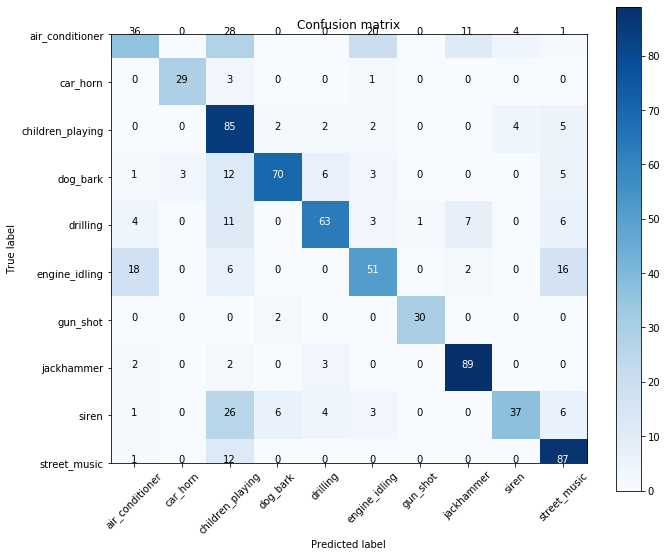

In [336]:
plt.figure(figsize = (10,8))
plot_confusion_matrix(cnf_matrix, classes=list(train_generator.class_indices.keys())
                      #title='Confusion matrix, without normalization')
                     )

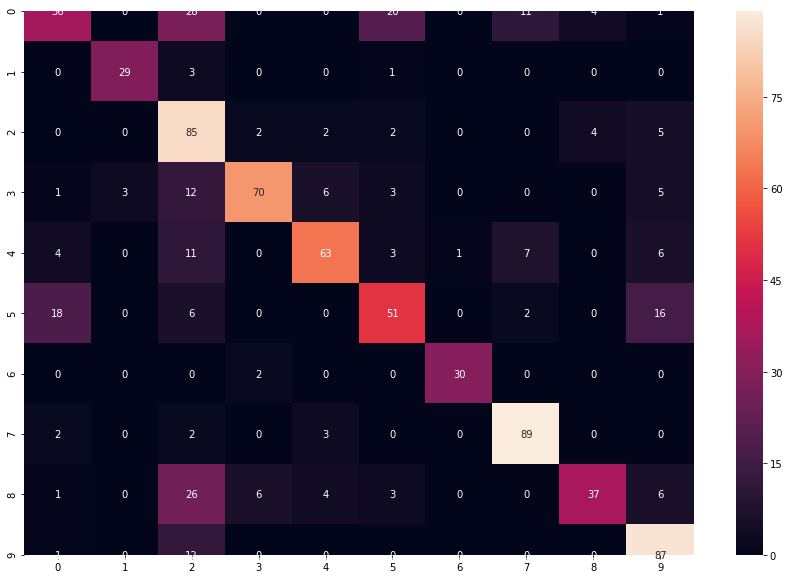

In [318]:
fig, ax = plt.subplots(figsize=(15,10))
sn.heatmap(cnf_matrix, annot=True,ax=ax)